In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")

# Display the data table for preview
#merged_data_df.head(20)
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#df.loc[df['column_name'].isin(some_values)]
merged_data_df = merged_data_df.loc[merged_data_df['Drug'].isin(drug_list)]
merged_data_df.tail()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
temp = merged_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_tumor_vol_data_df = pd.DataFrame(temp)
# Preview DataFrame
mean_tumor_vol_data_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
#mean_tumor_vol_data_df = mean_tumor_vol_data_df.reset_index(drop=False)
mean_tumor_vol_data_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_tumor_sem_vol_data_groupby = merged_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
mean_tumor_sem_vol_data_df = pd.DataFrame(mean_tumor_sem_vol_data_groupby)
# Preview DataFrame
mean_tumor_sem_vol_data_df.head(20)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427

In [5]:
#mean_tumor_sem_vol_data_df.reset_index(inplace=True)
mean_tumor_sem_vol_data_df.head()
mean_tumor_sem_vol_data_df = mean_tumor_sem_vol_data_df.unstack(level=0)
mean_tumor_sem_vol_data_df.columns = mean_tumor_sem_vol_data_df.columns.droplevel()
mean_tumor_sem_vol_data_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_data_df = mean_tumor_vol_data_df.unstack(level=0)
mean_tumor_vol_data_df.columns = mean_tumor_vol_data_df.columns.droplevel()
x_axis = mean_tumor_vol_data_df.index
# Preview that Reformatting worked
#x_axis

mean_tumor_vol_data_df.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


Text(0.5,1,'Tumor Volume over 45 Day Trial')

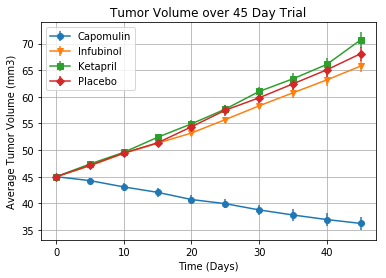

In [7]:
fig, ax = plt.subplots()
# Generate the Plot (with Error Bars)
#plt.plot(x_axis, mean_tumor_vol_data_df)
ax.errorbar(x_axis, mean_tumor_vol_data_df['Capomulin'], yerr=mean_tumor_sem_vol_data_df['Capomulin'], marker='o')
ax.errorbar(x_axis, mean_tumor_vol_data_df['Infubinol'], yerr=mean_tumor_sem_vol_data_df['Infubinol'], marker='v')
ax.errorbar(x_axis, mean_tumor_vol_data_df['Ketapril'], yerr=mean_tumor_sem_vol_data_df['Ketapril'], marker='s')
ax.errorbar(x_axis, mean_tumor_vol_data_df['Placebo'], yerr=mean_tumor_sem_vol_data_df['Placebo'], marker='D')
plt.legend()
plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume over 45 Day Trial")
# Save the Figure



In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
temp = merged_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_metastatic_data_df = pd.DataFrame(temp)
# Preview DataFrame
mean_metastatic_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
temp = merged_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
sem_metastatic_data_df = pd.DataFrame(temp)
# Preview DataFrame
sem_metastatic_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
mean_metastatic_data_df = mean_metastatic_data_df.unstack(level=0)
mean_metastatic_data_df.columns = mean_metastatic_data_df.columns.droplevel()
mean_metastatic_data_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [12]:
# Minor Data Munging to Re-Format the Data Frames
sem_metastatic_data_df = sem_metastatic_data_df.unstack(level=0)
sem_metastatic_data_df.columns = sem_metastatic_data_df.columns.droplevel()
# Preview that Reformatting worked
sem_metastatic_data_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


In [13]:
x_axis = mean_metastatic_data_df.index

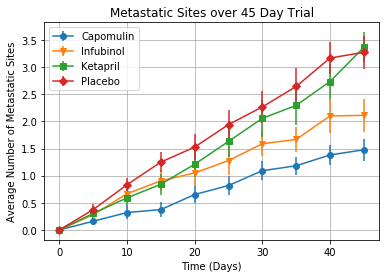

In [14]:
fig, ax = plt.subplots()
# Generate the Plot (with Error Bars)
ax.errorbar(x_axis, mean_metastatic_data_df['Capomulin'], yerr=sem_metastatic_data_df['Capomulin'], marker='o')
ax.errorbar(x_axis, mean_metastatic_data_df['Infubinol'], yerr=sem_metastatic_data_df['Infubinol'], marker='v')
ax.errorbar(x_axis, mean_metastatic_data_df['Ketapril'], yerr=sem_metastatic_data_df['Ketapril'], marker='s')
ax.errorbar(x_axis, mean_metastatic_data_df['Placebo'], yerr=sem_metastatic_data_df['Placebo'], marker='D')
plt.legend()
plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Average Number of Metastatic Sites")
plt.title("Metastatic Sites over 45 Day Trial")
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
temp = merged_data_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
count_mouse_data_df = pd.DataFrame(temp)
# Preview DataFrame
count_mouse_data_df = count_mouse_data_df.rename(columns={'Mouse ID': 'Mouse Count'})
count_mouse_data_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
count_mouse_data_df = count_mouse_data_df.unstack(level=0)
count_mouse_data_df.columns = count_mouse_data_df.columns.droplevel()
# Preview the Data Frame
count_mouse_data_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [17]:
survival_rate_data_df = count_mouse_data_df.copy()
survival_rate_data_df['Capomulin'] = survival_rate_data_df['Capomulin'].apply(lambda x: (x/25)*100)
survival_rate_data_df['Infubinol'] = survival_rate_data_df['Infubinol'].apply(lambda x: (x/25)*100)
survival_rate_data_df['Ketapril'] = survival_rate_data_df['Ketapril'].apply(lambda x: (x/25)*100)
survival_rate_data_df['Placebo'] = survival_rate_data_df['Placebo'].apply(lambda x: (x/25)*100)
survival_rate_data_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


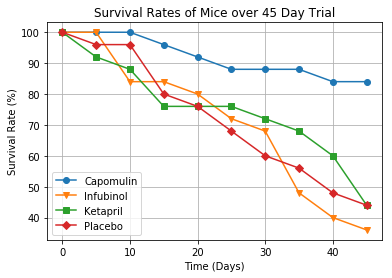

In [18]:
fig, ax = plt.subplots()
# Generate the Plot (Accounting for percentages)
ax.errorbar(survival_rate_data_df.index, survival_rate_data_df['Capomulin'], marker='o')
ax.errorbar(survival_rate_data_df.index, survival_rate_data_df['Infubinol'], marker='v')
ax.errorbar(survival_rate_data_df.index, survival_rate_data_df['Ketapril'], marker='s')
ax.errorbar(survival_rate_data_df.index, survival_rate_data_df['Placebo'], marker='D')
plt.legend()
plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rates of Mice over 45 Day Trial")
# Save the Figure

# Show the Figure
plt.show()

In [19]:
tumor_vol_change_data_df = pd.concat([mean_tumor_vol_data_df.head(1), 
                                      mean_tumor_vol_data_df.tail(1)])
#tumor_vol_change_data_df = tumor_vol_change_data_df.reset_index()
tumor_vol_change_data_df[:] = tumor_vol_change_data_df.apply(lambda x: ((x-45)/45)*100)
tumor_vol_change_data_df = tumor_vol_change_data_df.reset_index()
tumor_vol_change_data_df = tumor_vol_change_data_df.drop([0])
tumor_vol_change_data_df = tumor_vol_change_data_df.drop(columns='Timepoint')
tumor_vol_change_data_df = tumor_vol_change_data_df.T
tumor_vol_change_data_df = tumor_vol_change_data_df.rename(columns={1:"Tumor Growth Change"})
tumor_vol_change_data_df.head()

,Tumor Growth Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
#tumor_vol_change_data_df = tumor_vol_change_data_df.reset_index()
# Display the data to confirm
tumor_vol_change_data_df.head()

,Tumor Growth Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [21]:
data_tuples = list(tumor_vol_change_data_df.itertuples(index=True))
data_tuples[0][0]

'Capomulin'

Text(0.5,1,'Tumor Change over 45 Day Treatment')

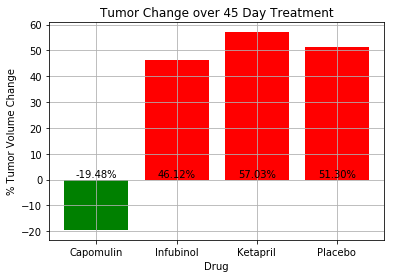

In [23]:
fig, ax = plt.subplots()
# Store all Relevant Percent Changes into a Tuple
x_axis = tumor_vol_change_data_df.index
#x_axis = np.arange(len(tumor_vol_change_data_df))
# Splice the data between passing and failing drugs
plt.bar(x_axis, tumor_vol_change_data_df['Tumor Growth Change'], color=['g','r','r','r'], alpha=1)
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
def autolabel(data_tuple):
    # attach some text labels
    for data in data_tuple:
        ax.text(data[0], 0,
                '%.2f' % float(data[1]) + "%",
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(data_tuples)
plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drug")
plt.title("Tumor Change over 45 Day Treatment")
# Save the Figure


# Show the Figure
#fig.show()